In [102]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
from datetime import datetime

import glob
import os
import sys

sys.path.append('/glade/u/home/currierw/src/icar/helpers')
import aggregate_parallel_files

%matplotlib inline

# Error Message in using cmip2icarForce.py
* Error message `Coordinate variable time is neither monotonically increasing nor monotonically decreasing on all datasets`
* Va data stall in January 2068 for RCP45
* Va data resume and are fine in 2069 and 2070
* See below for error messages

In [35]:
files=sorted(glob.glob('/glade/u/home/currierw/scratch/bcc-csm1-1/rcp45/va*.nc'))

### Loop through files to see which file it goes bad at

In [75]:
lat_bnds, lon_bnds = [22, 58], [230, 265]
for ii in range(0,len(files)-1):
    if ii == 0:
        dsFinal=xr.open_dataset(files[0])
        dsFinal=dsFinal.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds))
    dsTmp=xr.open_dataset(files[ii])
    dsTmp=dsTmp.sel(lat=slice(*lat_bnds),lon=slice(*lon_bnds))
    dsFinal=xr.merge([dsFinal,dsTmp])

ValueError: cannot reindex or align along dimension 'time' because the index has duplicate values

In [76]:
dsFinal

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 13, lev: 26, lon: 13, time: 90520)
Coordinates:
  * time       (time) object 2006-01-01 00:00:00 ... 2067-12-31 18:00:00
  * lev        (lev) float64 0.9926 0.9706 0.9296 ... 0.01397 0.007389 0.003545
  * lat        (lat) float64 23.72 26.51 29.3 32.09 ... 48.84 51.63 54.42 57.21
  * lon        (lon) float64 230.6 233.4 236.2 239.1 ... 255.9 258.8 261.6 264.4
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 2005-12-31 21:00:00 ... 2067-12-31 21:00:00
    lev_bnds   (lev, bnds) float64 1.0 0.9851 0.9851 ... 0.004895 0.002194
    p0         float32 100000.0
    a          (lev) float64 0.0 0.001261 0.004803 ... 0.01397 0.007389 0.003545
    b          (lev) float64 0.9926 0.9693 0.9248 0.8569 ... 0.0 0.0 0.0 0.0
    ps         (time, lat, lon) float32 101927.07 101902.89 ... 100993.16
    a_bnds     (lev, bnds) float64 0.0 0.0 0.0 ... 0.004895 0.004895 0.002194
    b_bnds     (lev, bnds) float64 1.0 0.9851 0.9851 0.9535 ... 0.0 0.0 0.0 0.0
    lat_bnds   (lat, bnds) float64 22.32 25.12 25.12 27.91 ... 55.81 55.81 58.6
    lon_bnds   (lon, bnds) float64 229.2 232.0 232.0 234.8 ... 263.0 263.0 265.8
    va         (time, lev, lat, lon) float32 -7.0418625 -7.191402 ... -26.255524

In [77]:
ii

62

### Bad File

In [94]:
files[62]

'/glade/u/home/currierw/scratch/bcc-csm1-1/rcp45/va_6hrLev_bcc-csm1-1_rcp45_r1i1p1_206801010000-206812311800.nc'

### Visualize time-series of va data before that

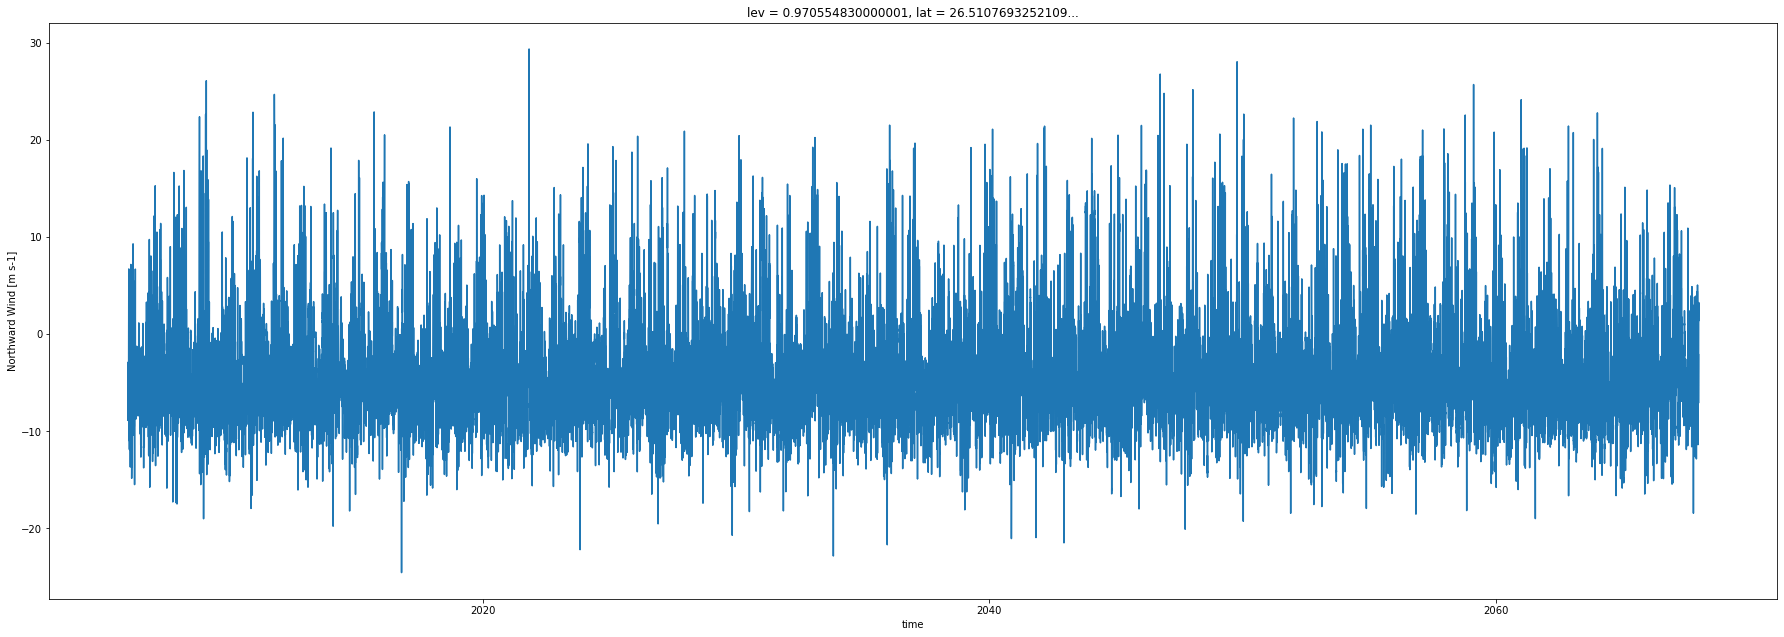

In [85]:
ax = plt.axes((0,0,4,2))
dsFinal['va'][:,1,1,1].plot()

### Bad File Visualziaton

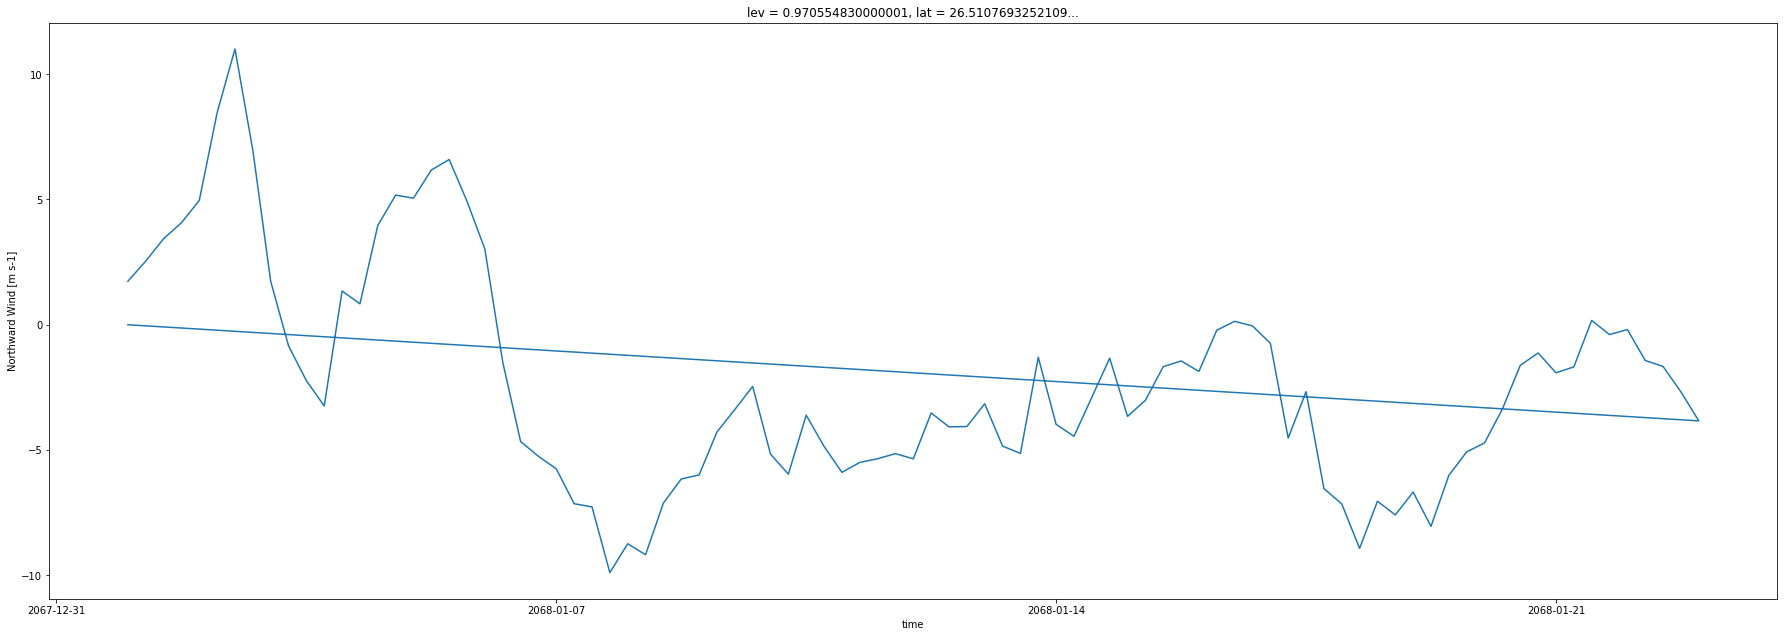

In [86]:
ax = plt.axes((0,0,4,2))
dsTmp['va'][:,1,1,1].plot()
# Note that this only goes until January 1 2068

### Do Va data actually just stop? are they all just 0 after January?

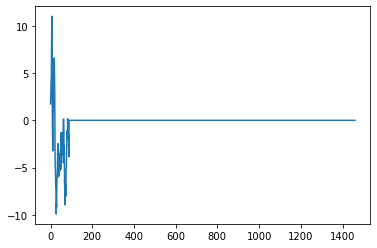

In [100]:
plt.plot(range(0,1460),np.array(dsTmp['va'][:,1,1,1])) #1460 time steps at 6 hour frequency in a year

In [95]:
# dsTmp['time'][1:10]
dsTmp['time'][-10:-1]

<xarray.DataArray 'time' (time: 9)>
array([cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00),
       cftime.DatetimeNoLeap(2068-01-01 00:00:00)], dtype=object)
Coordinates:
  * time     (time) object 2068-01-01 00:00:00 ... 2068-01-01 00:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

# Check other files after 1968

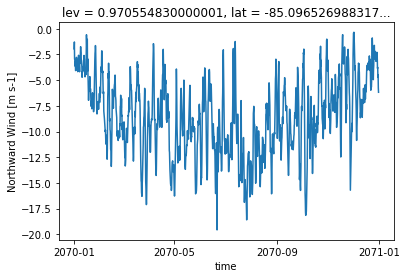

In [96]:
dsTmp2=xr.open_dataset(files[64])
dsTmp2['va'][:,1,1,1].plot()

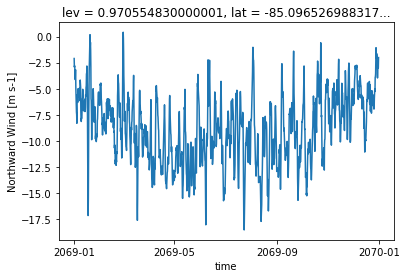

In [101]:
dsTmp2=xr.open_dataset(files[63])
dsTmp2['va'][:,1,1,1].plot()